In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 

# these are new 
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 
import os                       # operating system tools (check files)

In [8]:
url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

In [9]:
r = requests.get(url)

In [14]:
r.headers

{'Date': 'Thu, 11 Apr 2019 18:21:54 GMT', 'Server': 'Apache/2.4.18 (Ubuntu)', 'Last-Modified': 'Wed, 26 Sep 2018 20:59:04 GMT', 'ETag': '"eed1a-576cc7e19499e"', 'Accept-Ranges': 'bytes', 'Content-Length': '978202', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'application/zip'}

In [16]:
type(r.content)

bytes

In [20]:
mlz = zf.ZipFile(io.BytesIO(r.content))

In [21]:
type(mlz)

zipfile.ZipFile

In [22]:
mlz.namelist()

['ml-latest-small/',
 'ml-latest-small/links.csv',
 'ml-latest-small/tags.csv',
 'ml-latest-small/ratings.csv',
 'ml-latest-small/README.txt',
 'ml-latest-small/movies.csv']

In [23]:
dfmovies = pd.read_csv(mlz.open(mlz.namelist()[5]))

In [28]:
dfmovies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [29]:
dfmovies.movieId.unique().shape

(9742,)

In [30]:
dfmovies.shape

(9742, 3)

In [31]:
dfratings = pd.read_csv(mlz.open(mlz.namelist()[3]))

In [33]:
dfratings.head(15)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [36]:
dfratings.shape

(100836, 4)

In [37]:
dfratings.movieId.unique().shape

(9724,)

In [51]:
combo = pd.merge(dfmovies, dfratings, on = "movieId",
                how = "inner", indicator = True)

In [52]:
combo[~(combo["_merge"] == "both")].shape

(0, 7)

In [53]:
combo.shape

(100836, 7)

In [54]:
combo.head()

,movieId,title,genres,userId,rating,timestamp,_merge
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,both
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,both
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,both
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,both
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,both


In [55]:
combo.rating.mean()

3.501556983616962

In [56]:
combo.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [59]:
combo[combo.rating == 5.0].tail(25)

,movieId,title,genres,userId,rating,timestamp,_merge
100590,176371,Blade Runner 2049 (2017),Sci-Fi,567,5.0,1525282063,both
100601,176601,Black Mirror,(no genres listed),62,5.0,1525795252,both
100603,176751,American Made (2017),Crime|Thriller,339,5.0,1506987433,both
100610,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,25,5.0,1535470532,both
100612,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,212,5.0,1527794935,both
100613,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,233,5.0,1524781384,both
100615,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,338,5.0,1530148460,both
100624,177765,Coco (2017),Adventure|Animation|Children,98,5.0,1532457474,both
100626,177765,Coco (2017),Adventure|Animation|Children,210,5.0,1537632257,both
100628,177765,Coco (2017),Adventure|Animation|Children,272,5.0,1533490600,both


In [66]:
grp = combo.groupby(["title"])

In [67]:
grp_ratings = grp.rating.agg(["count", "mean"])

In [75]:
grp_ratings.sort_values(["count"], ascending=False).head(20)

,count,mean
title,,
Forrest Gump (1994),329,4.164134
"Shawshank Redemption, The (1994)",317,4.429022
Pulp Fiction (1994),307,4.197068
"Silence of the Lambs, The (1991)",279,4.161290
"Matrix, The (1999)",278,4.192446
Star Wars: Episode IV - A New Hope (1977),251,4.231076
Jurassic Park (1993),238,3.750000
Braveheart (1995),237,4.031646
Terminator 2: Judgment Day (1991),224,3.970982


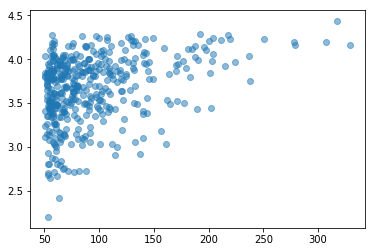

In [86]:
threshold = grp_ratings["count"] > 50


fig, ax = plt.subplots()

ax.scatter(grp_ratings[threshold]["count"], grp_ratings[threshold]["mean"], alpha = 0.50)

plt.show()

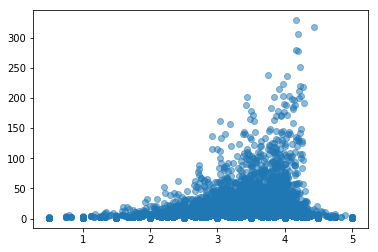

In [84]:
fig, ax = plt.subplots()

ax.scatter( grp_ratings["mean"],grp_ratings["count"], alpha = 0.50)

plt.show()

In [95]:
just_cact = combo.genres.isin(["Comedy", "Action"])

In [92]:
combo.head(

,movieId,title,genres,userId,rating,timestamp,_merge
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,both
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,both
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,both
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,both
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,both


In [98]:
combo[just_comedy].shape

(7196, 7)

In [101]:
just_comedy.shape

(100836,)

In [97]:
combo[just_cact].shape

(7382, 7)

In [102]:
def pstring(df, xxx):
    print(xxx)

In [103]:
pstring("BUD LIGHT")

BUD LIGHT
